<a href="https://colab.research.google.com/github/ly5977507/Maschine-learning/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
pip install pandas-datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 29.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
# Get the stock quote
df = web.DataReader('AAPL',start='2015-01-01', end='2022-08-09 ',data_source='yahoo')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644022
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949759
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952015
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287872
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.221060
...,...,...,...,...,...,...
2022-08-02,162.410004,159.630005,160.100006,160.009995,59907000.0,159.788040
2022-08-03,166.589996,160.750000,160.839996,166.130005,82507500.0,165.899567
2022-08-04,167.190002,164.429993,166.009995,165.809998,55474100.0,165.580002


In [4]:
# Get the number of rows and columns in the data set
df.shape

(1913, 6)

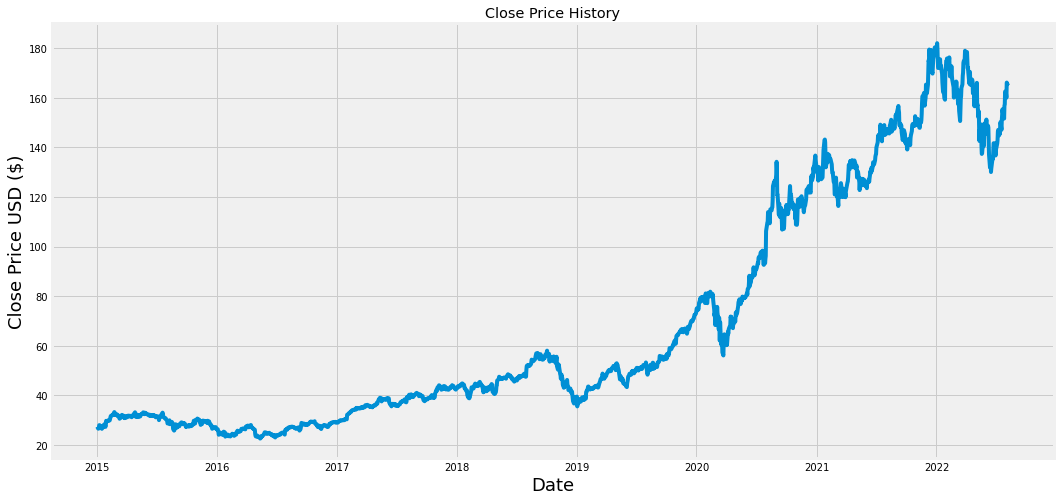

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on 
tranining_data_len = math.ceil(len(dataset)*.8)
tranining_data_len

1531

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0297789 ],
       [0.02494904],
       [0.02496473],
       ...,
       [0.89838484],
       [0.89549952],
       [0.89248863]])

In [9]:
from re import X
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:tranining_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.03012389, 0.03459308, 0.0355026 ,
       0.03569077, 0.02948095, 0.03915635, 0.04478596, 0.04205741,
       0.04436256, 0.04439393, 0.04582092, 0.04641682, 0.044833  ,
       0.04607183, 0.04967853, 0.0541634 , 0.05664106, 0.05761331,
       0.05878941, 0.06018505, 0.05976165, 0.06140819, 0.06689667,
       0.06559511, 0.06029481, 0.06285087, 0.05977734, 0.06076525,
       0.06118866, 0.05990277, 0.05656266, 0.0568606 , 0.05770739,
       0.0535832 , 0.05002353, 0.0534891 , 0.05214051, 0.05427317,
       0.05755058, 0.05979302, 0.05827192, 0.05576291, 0.05781716,
       0.05700174, 0.0518112 , 0.0531598 , 0.05160735, 0.05649993])]
[0.053457746504823156]

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.0

In [10]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1471, 60, 1)

In [14]:
# Buld the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1471/1471 [==============================] - 44s 27ms/step - loss: 9.1683e-04


In [19]:
# Create the testing data set
# Create a new array containing scaled values from index 1471 to 1913
test_data = scaled_data[tranining_data_len-60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[tranining_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  


In [20]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [21]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
# Get teh models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [26]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.096919274454966

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'low right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


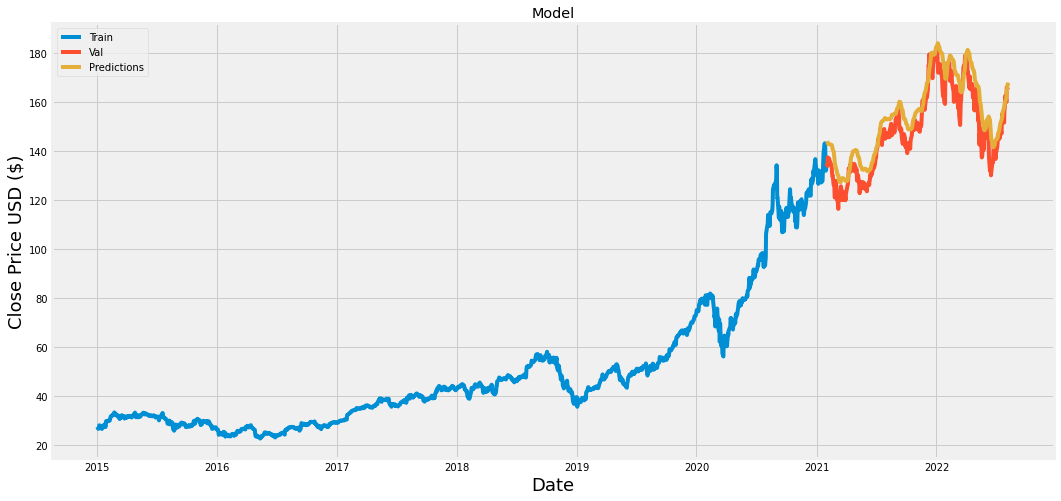

In [28]:
# Plot the data
train = data[:tranining_data_len]
valid = data[tranining_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='low right')
plt.show()

In [29]:
valid

,Close,Predictions
Date,,
2021-02-02,134.990005,144.054810
2021-02-03,133.940002,143.615448
2021-02-04,137.389999,143.065720
2021-02-05,136.759995,142.872162
2021-02-08,136.910004,142.800583
...,...,...
2022-08-02,160.009995,162.705338
2022-08-03,166.130005,163.769119
2022-08-04,165.809998,165.228134
